In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
data = pd.read_csv('User_Engagement.csv')
data1= pd.read_csv('User_Proficiency.csv')

In [3]:
data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00


In [4]:
data1.head()

,USERID,NAME,SKILLNAME,PROFICIENCYLEVEL
0,273,Madelin,DevOps practices,Advanced
1,772,Bernie,NaN,NaN
2,17,Fransisco,NaN,NaN
3,960,Lelia,NaN,NaN
4,268,Rhodia,Natural language processing,Intermediate


In [5]:
combined_data = pd.merge(data, data1, on='USERID', how='inner')

In [6]:
combined_data.head()

,USERID,NAME_x,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,NAME_y,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Sherie,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Donnajean,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Roderigo,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Arin,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Tully,Incident response,Advanced


In [7]:
combined_data.drop('NAME_y', axis=1, inplace=True)
combined_data.rename(columns={'NAME_x': 'NAME'}, inplace=True)


In [8]:
combined_data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,Advanced
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,Intermediate
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,Advanced
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),Advanced
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,Advanced


In [9]:
print(combined_data.isnull().sum())


USERID                    0
NAME                      0
TOTAL_PROJECTS            0
TOTAL_SKILLS              0
TOTAL_CERTIFICATIONS      0
ENGAGEMENT_SCORE          0
EMAILID                   0
ADDRESS                   0
PHONE                     0
ROLE                      0
DESIGNATION               0
DATA_LOADED_AT            0
SKILLNAME               364
PROFICIENCYLEVEL        364
dtype: int64


In [10]:
combined_data.dropna(subset=['SKILLNAME', 'PROFICIENCYLEVEL'], inplace=True)

In [11]:
data_processed = combined_data.drop(['USERID', 'NAME', 'DATA_LOADED_AT','PHONE'], axis=1)

In [12]:

combined_data['PROFICIENCYLEVEL'] = combined_data['PROFICIENCYLEVEL'].replace({'Advanced': 3, 'Intermediate': 2, 'Beginner': 1})


In [13]:
combined_data.head()

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,5,2,4,3.8,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,3
1,835,Donnajean,5,3,1,3.2,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,2
2,684,Roderigo,4,5,0,3.1,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,3
3,52,Arin,3,3,3,3.0,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),3
4,491,Tully,2,4,3,2.9,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,3


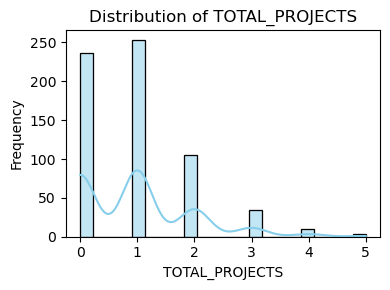

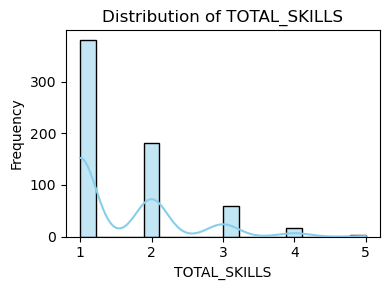

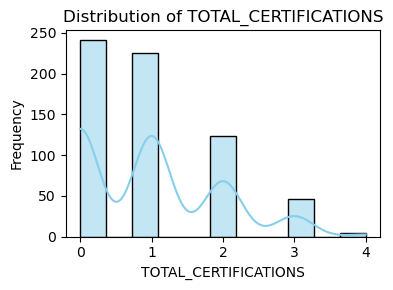

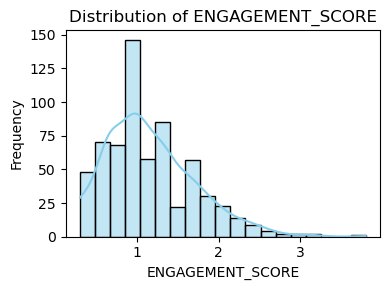

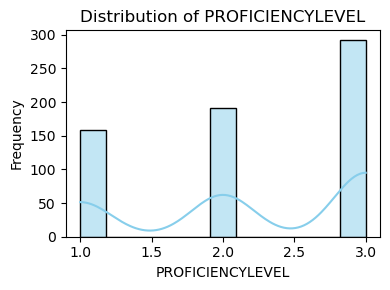

In [14]:
numerical_cols = ['TOTAL_PROJECTS', 'TOTAL_SKILLS', 'TOTAL_CERTIFICATIONS','ENGAGEMENT_SCORE','PROFICIENCYLEVEL'] 

for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(combined_data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()  
    plt.show()


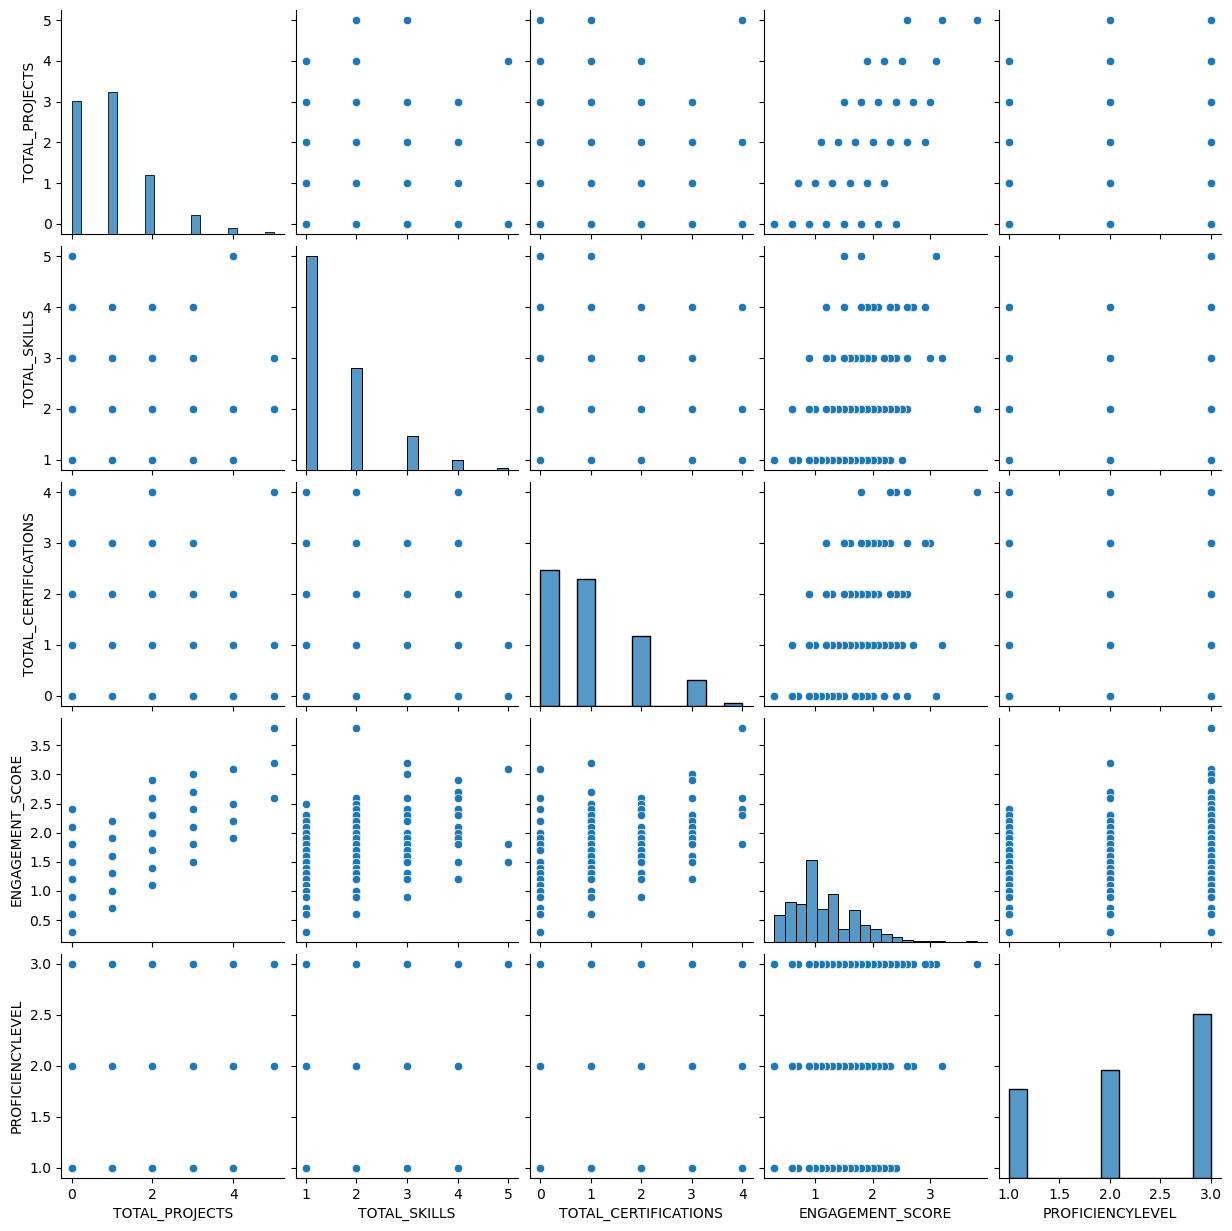

In [15]:
sns.pairplot(combined_data[numerical_cols])
plt.show()

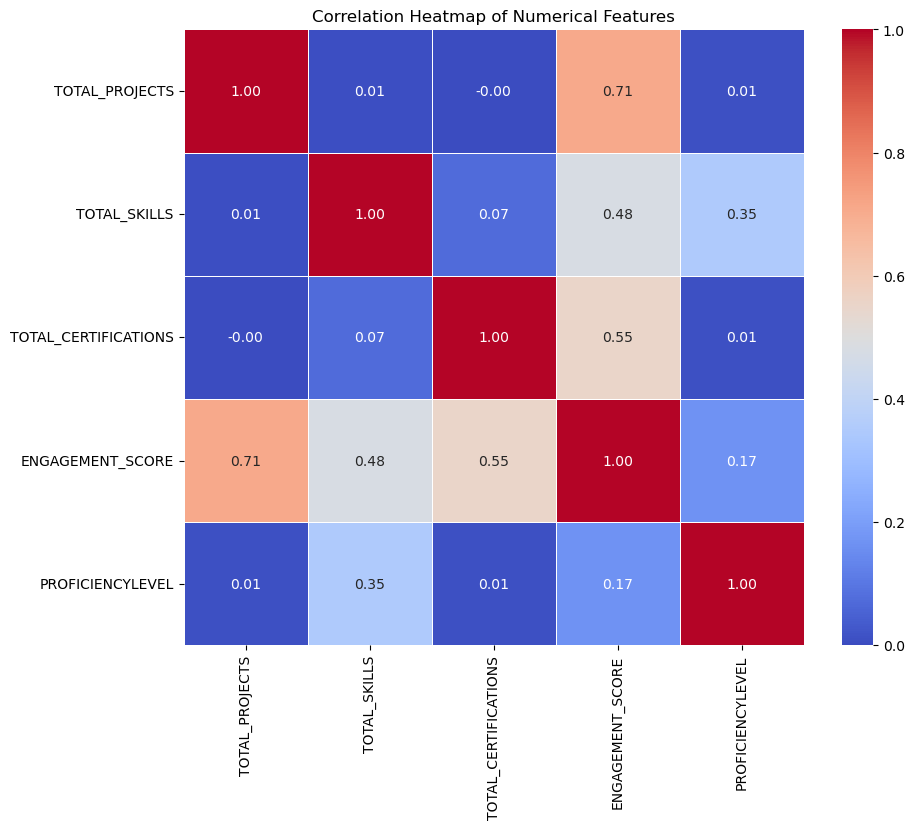

In [16]:
correlation_matrix = combined_data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

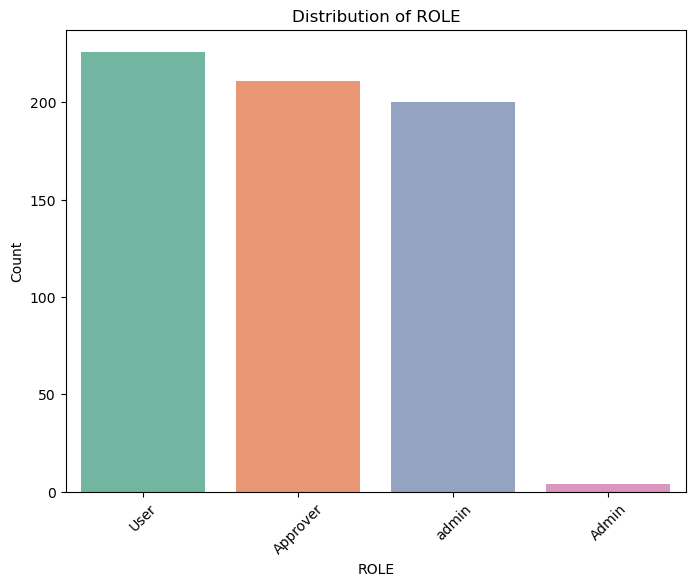

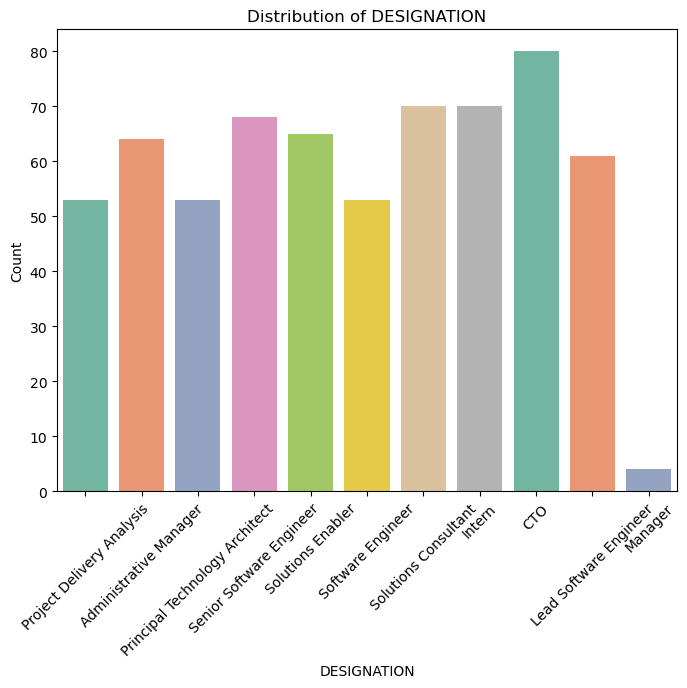

In [17]:
# Visualize distributions of categorical features
categorical_cols = ['ROLE','DESIGNATION']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=combined_data, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


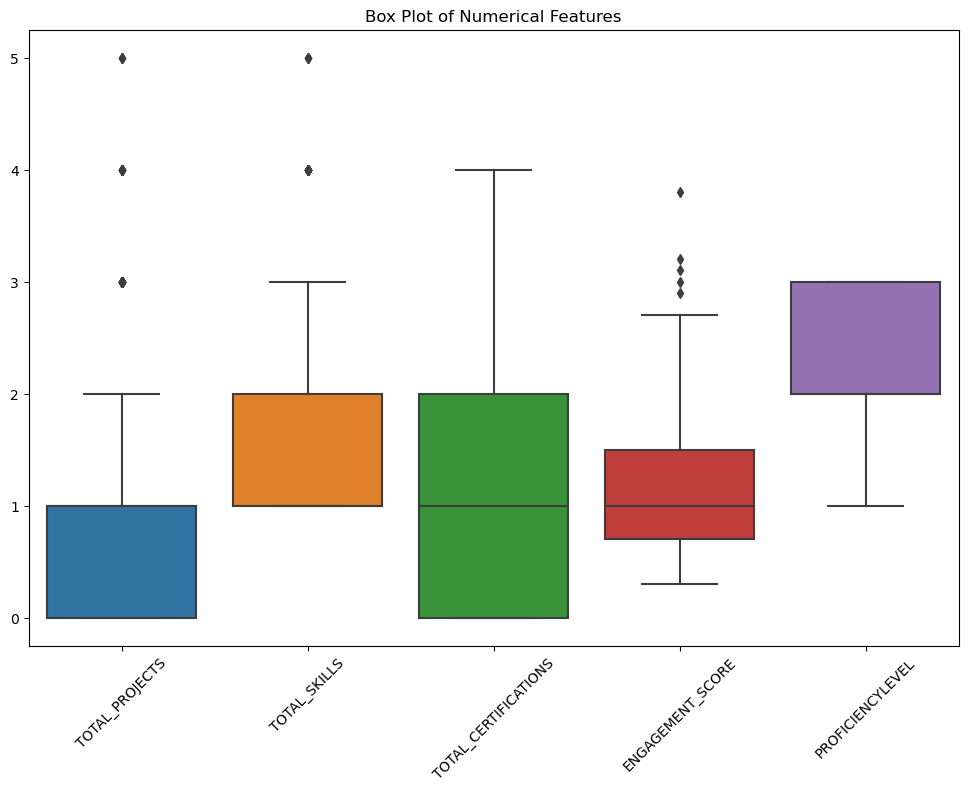

In [18]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_data[numerical_cols])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [19]:
#calculate z-scores for numerical features and identify outliers
from scipy.stats import zscore
z_scores = zscore(combined_data[numerical_cols])
outliers = (z_scores > 3) | (z_scores < -3)

In [20]:
# Print the indices of rows containing outliers
outlier_indices = combined_data.index[outliers.any(axis=1)]
print("Indices of Rows Containing Outliers:\n", outlier_indices)

Indices of Rows Containing Outliers:
 Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  12,  13,  14,
             19,  22,  29,  30,  31,  33,  35,  36,  37,  46,  64,  67,  71,
             81,  87,  88,  93,  96, 167, 196, 197, 310, 336],
           dtype='int64')


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])
combined_data

,USERID,NAME,TOTAL_PROJECTS,TOTAL_SKILLS,TOTAL_CERTIFICATIONS,ENGAGEMENT_SCORE,EMAILID,ADDRESS,PHONE,ROLE,DESIGNATION,DATA_LOADED_AT,SKILLNAME,PROFICIENCYLEVEL
0,466,Sherie,1.0,0.25,1.00,1.000000,sfeasbycx@liveinternet.ru,Suite 53,5479538486,User,Project Delivery Analysis,2024-04-10T01:37:51.882-07:00,Time management,1.0
1,835,Donnajean,1.0,0.50,0.25,0.828571,dblossn6@sogou.com,PO Box 36827,1997893877,Approver,Administrative Manager,2024-04-10T01:37:51.882-07:00,Vendor management,0.5
2,684,Roderigo,0.8,1.00,0.00,0.800000,rcaldowiz@spiegel.de,Suite 94,9513505161,Approver,Principal Technology Architect,2024-04-10T01:37:51.882-07:00,Bash scripting,1.0
3,52,Arin,0.6,0.50,0.75,0.771429,aperton1f@google.com.hk,Apt 412,5227837198,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,SEO (Search Engine Optimization),1.0
4,491,Tully,0.4,0.75,0.75,0.742857,tamisdm@ehow.com,Apt 232,9157164282,admin,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Incident response,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,348,Larry,0.0,0.00,0.00,0.000000,ltrazzi9n@icq.com,PO Box 29284,1514893157,Approver,Software Engineer,2024-04-10T01:37:51.882-07:00,Natural language processing,0.0
953,540,Igor,0.0,0.00,0.00,0.000000,icanarioez@sun.com,5th Floor,6005325662,User,CTO,2024-04-10T01:37:51.882-07:00,Usability testing,0.0
954,422,Karla,0.0,0.00,0.00,0.000000,kwrittlebp@telegraph.co.uk,6th Floor,2055772250,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Network security,1.0
956,93,Noble,0.0,0.00,0.00,0.000000,nstampfer2k@webnode.com,Suite 77,9609103319,Approver,Senior Software Engineer,2024-04-10T01:37:51.882-07:00,Cryptocurrency,0.5


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# combined_data = pd.get_dummies(combined_data, columns=['ROLE', 'DESIGNATION'])

combined_data['Suitable_for_Project'] = (combined_data['PROFICIENCYLEVEL'] >= 0.5) & (combined_data['ENGAGEMENT_SCORE'] >= 0.5)


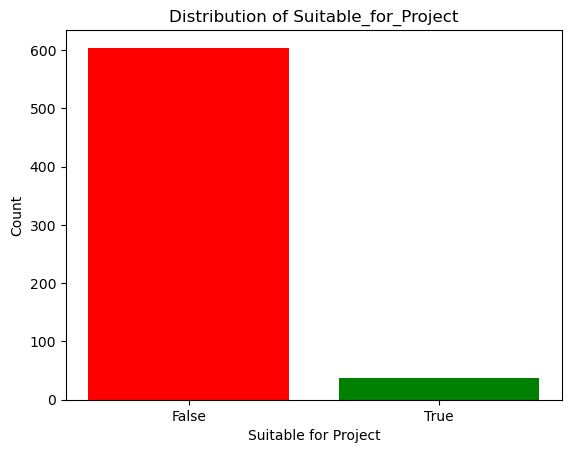

In [86]:
import matplotlib.pyplot as plt

# Count the number of True and False values in the Suitable_for_Project column
suitable_counts = combined_data['Suitable_for_Project'].value_counts()

# Create a bar plot
plt.bar(['False', 'True'], suitable_counts, color=['red', 'green'])

# Add labels and title
plt.xlabel('Suitable for Project')
plt.ylabel('Count')
plt.title('Distribution of Suitable_for_Project')

# Show plot
plt.show()


In [87]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and target variable
X = combined_data.drop(columns=['Suitable_for_Project'])
y = combined_data['Suitable_for_Project']

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Count the number of True and False values in the resampled dataset
resampled_counts = pd.Series(y_resampled).value_counts()





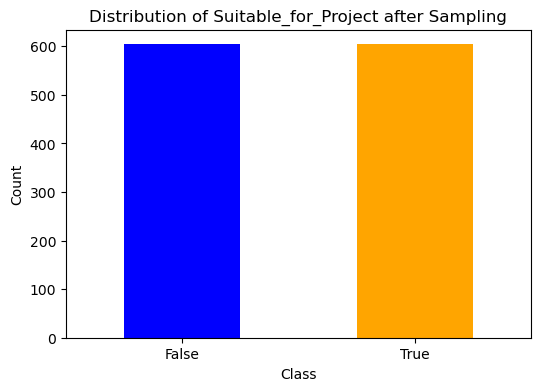

In [88]:

import matplotlib.pyplot as plt

# Plot the distribution of the resampled target variable
plt.figure(figsize=(6, 4))
resampled_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Suitable_for_Project after Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['False', 'True'], rotation=0)
plt.show()


In [89]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load your combined_data DataFrame here
# combined_data = ...

# Step 1: Encode Categorical Variables
categorical_features = ['SKILLNAME']  # Assuming 'SKILLNAME' is categorical
numeric_features = ['PROFICIENCYLEVEL', 'ENGAGEMENT_SCORE']  # Assuming these are numerical

# Step 2: Handle Missing Values
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Resample the training data
oversampler = RandomOverSampler(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
# X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Step 5: Train the Model
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])  # You can choose a different classifier if needed

classifier.fit(X_train_resampled, y_train_resampled)

# Step 6: Evaluate the Model
y_pred = classifier.predict(X_test)


In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
import pandas as pd

# Function to calculate the engagement score
def calculate_engagement_score(total_projects, total_skills, total_certifications):
    return (total_projects * 0.2) + (total_skills * 0.2) + (total_certifications * 0.1)

# Function to get user input
def get_user_input():
    skill_name = input("Enter the skill name: ")
    proficiency_level = float(input("Enter the proficiency level (0 to 1): "))
    total_projects = int(input("Enter total projects completed: "))
    total_skills = int(input("Enter total skills: "))
    total_certifications = int(input("Enter total certifications: "))
    engagement_score = calculate_engagement_score(total_projects, total_skills, total_certifications)
    return pd.DataFrame([[skill_name, proficiency_level, engagement_score]], columns=['SKILLNAME', 'PROFICIENCYLEVEL', 'ENGAGEMENT_SCORE'])

# Function to predict suitability for the project
def predict_suitability(user_input):
    prediction = classifier.predict(user_input)
    if prediction[0] == 1:
        print("The user is suitable for the project.")
    else:
        print("The user is not suitable for the project.")

# Get input from the user
user_input = get_user_input()

# Predict suitability for the project
predict_suitability(user_input)


Enter the skill name: h
Enter the proficiency level (0 to 1): .7
Enter total projects completed: 4


In [94]:
pip install imbalanced-learn